# Spotify Song Attributes Dataset Analysis

## Motivation
Spotify has become one of the world's largest music streaming platforms, making it a great case study for analyzing trends in music consumption and production. Using publicly available Spotify song data, I want to see the factors that make a song popular, genre patterns, trends over the years, and feature correlations.

In this notebook, I will use the 'Spotify Tracks Dataset' from Kaggle:

https://www.kaggle.com/datasets/nelgiriyewithana/top-spotify-songs-2023?resource=download

## Questions I Will Explore:
1. What are the top 10 most popular songs and artists in the dataset?
2. How do audio features like danceability, energy, and valence correlate with song popularity?
3. Which year had the highest average popularity for songs?
4. Do songs get faster in terms of BPM over the years?
5. What are the most common BPMs for songs?
6. What distinguishes the top 1% most popular songs from the rest?

## Data Loading and Preprocessing

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
sns.set(style="whitegrid")

### Load Dataset

In [7]:
df = pd.read_csv("spotify-2023.csv")

In [8]:
df.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


### Data Cleaning

In [10]:
# Check for missing values
print(df.isnull().sum())

track_name               0
artist(s)_name           0
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  0
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists      0
in_deezer_charts         0
in_shazam_charts        50
bpm                      0
key                     95
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
dtype: int64


In [11]:
# Drop rows with missing values
df.dropna(inplace=True)

In [12]:
# Rename columns for consistency
df.columns = df.columns.str.lower().str.replace(" ", "_")

In [ ]:
# Drop irrelevant columns
columns_to_drop = ['key', 'mode']
df.drop(columns=columns_to_drop, inplace=True)

In [24]:
# Convert column streams to numeric type, filling with NaN where conversion fails
df['streams'] = pd.to_numeric(df['streams'], errors='coerce').fillna(0).astype(int)

## Exploratory Data Analysis

#### 1. Top 10 most popular songs

In [25]:
popular_songs = df.sort_values(by='streams', ascending=False).head(10)[['track_name', 'artist(s)_name', 'streams']]
popular_songs

,track_name,artist(s)_name,streams
179,Shape of You,Ed Sheeran,3562543890
41,Sunflower - Spider-Man: Into the Spider-Verse,"Post Malone, Swae Lee",2808096550
162,One Dance,"Drake, WizKid, Kyla",2713922350
84,STAY (with Justin Bieber),"Justin Bieber, The Kid Laroi",2665343922
140,Believer,Imagine Dragons,2594040133
725,Closer,"The Chainsmokers, Halsey",2591224264
48,Starboy,"The Weeknd, Daft Punk",2565529693
138,Perfect,Ed Sheeran,2559529074
693,Se��o,"Shawn Mendes, Camila Cabello",2484812918
324,Say You Won't Let Go,James Arthur,2420461338


#### 2. Feature Correlation

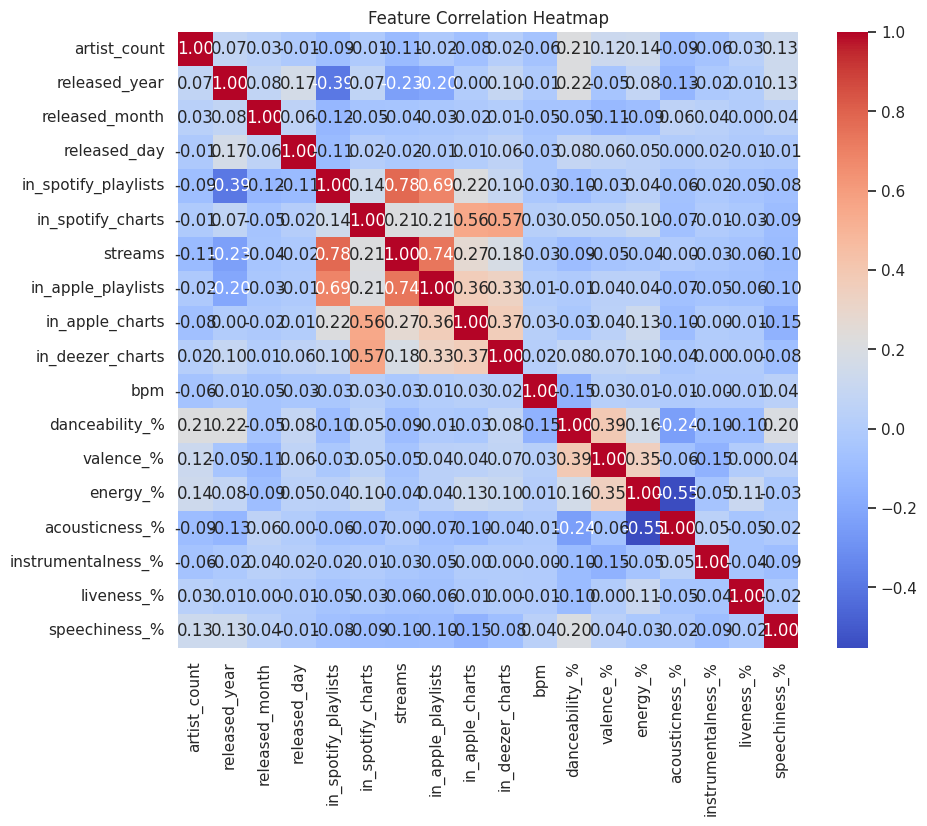

In [ ]:
# Show correlations between each feature in dataset
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

Feature with highest correlation to streams: in_spotify_playlists (0.78)


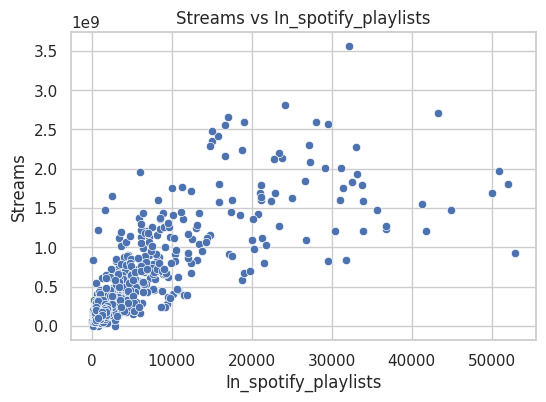

In [ ]:
# Display trend of the 2 most correlated features
cor_matrix = df.corr(numeric_only=True)
cor_target = cor_matrix['streams'].drop('streams')
most_corr_feature = cor_target.abs().idxmax()
cor_value = cor_target[most_corr_feature]

print(f"Feature with highest correlation to streams: {most_corr_feature} ({cor_value:.2f})")

plt.figure(figsize=(6, 4))
sns.scatterplot(data=df, x=most_corr_feature, y='streams')
plt.title(f"Streams vs {most_corr_feature.capitalize()}")
plt.xlabel(most_corr_feature.capitalize())
plt.ylabel("Streams")
plt.show()

#### 3. Popularity over the years

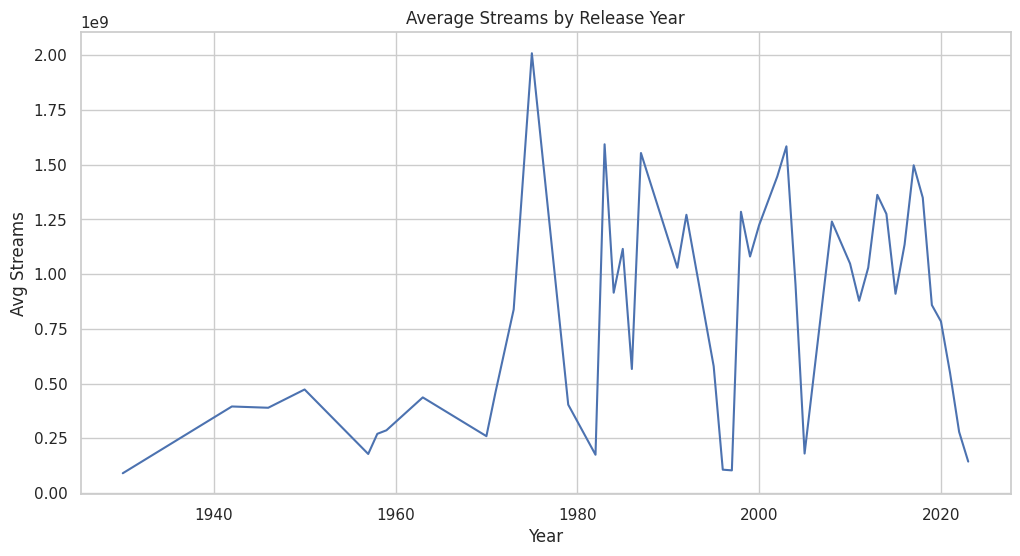

In [35]:
# Generate line graph of average streams for each year
avg_pop_by_year = df.groupby('released_year')['streams'].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.lineplot(data=avg_pop_by_year, x='released_year', y='streams')
plt.title("Average Streams by Release Year")
plt.xlabel("Year")
plt.ylabel("Avg Streams")
plt.show()

#### 4. Bpm over the years

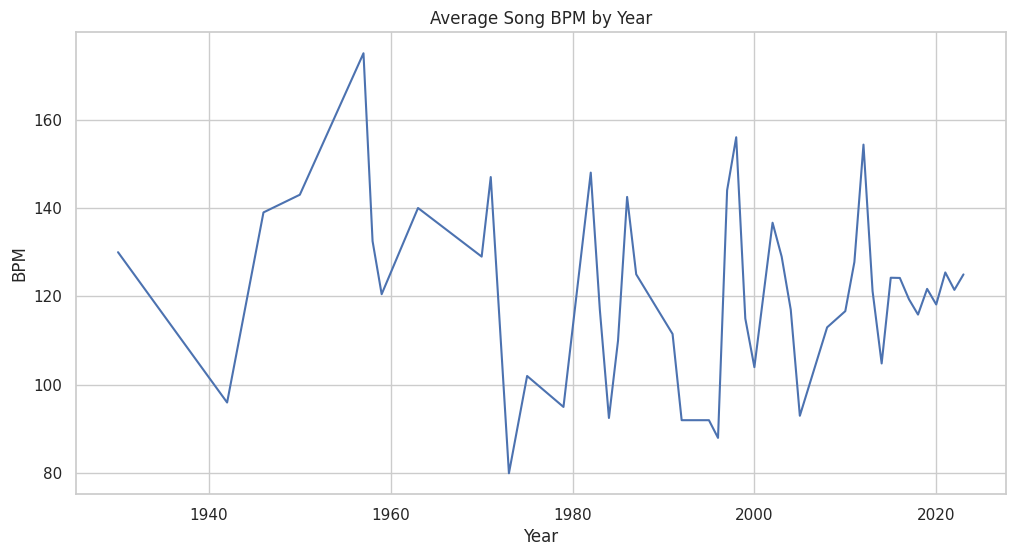

In [36]:
avg_duration_by_year = df.groupby('released_year')['bpm'].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.lineplot(data=avg_duration_by_year, x='released_year', y='bpm')
plt.title("Average Song BPM by Year")
plt.xlabel("Year")
plt.ylabel("BPM")
plt.show()

#### 5. Most Common Song Characteristics (BPM)

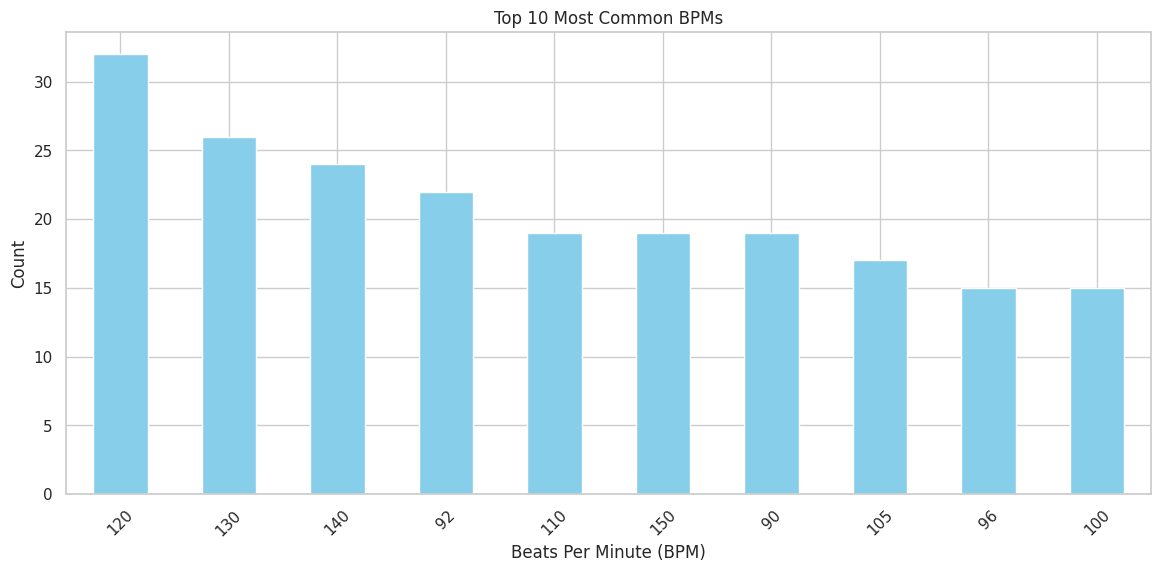

In [38]:
# Plot a bar graph with the most common bpms and the amount of songs for each
plt.figure(figsize=(14, 6))
df['bpm'].value_counts().head(10).plot(kind='bar', color='skyblue')
plt.title("Top 10 Most Common BPMs")
plt.xlabel("Beats Per Minute (BPM)")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

#### 6. Comparing top 1% popular songs

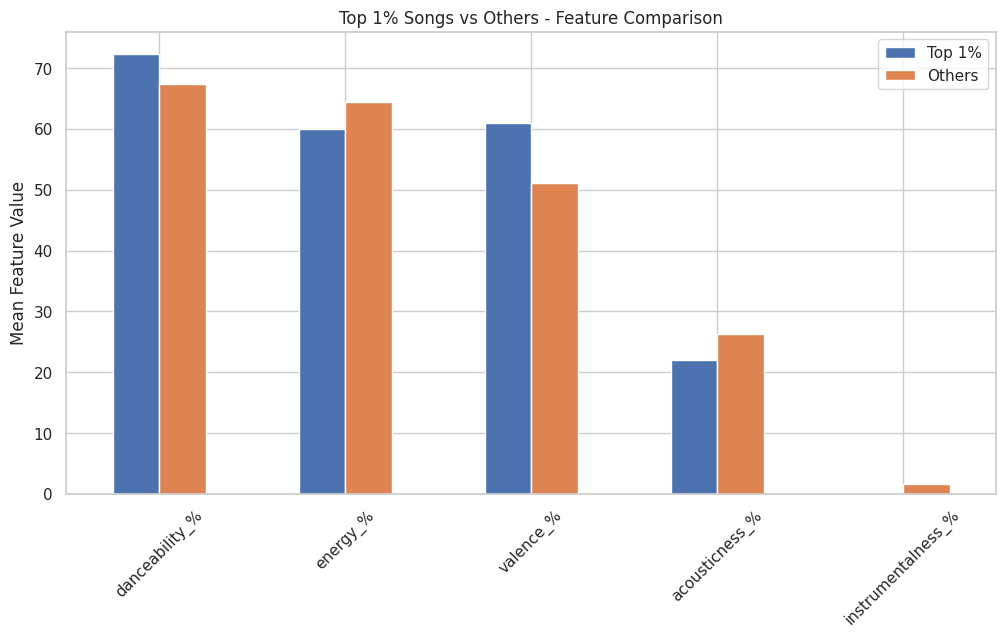

In [39]:
pop_threshold = np.percentile(df['streams'], 99)
top_1_percent = df[df['streams'] >= pop_threshold]

features = ['danceability_%', 'energy_%', 'valence_%', 'acousticness_%', 'instrumentalness_%']
mean_top = top_1_percent[features].mean()
mean_rest = df[~df.index.isin(top_1_percent.index)][features].mean()

compare_df = pd.DataFrame({'Top 1%': mean_top, 'Others': mean_rest})
compare_df.plot(kind='bar', figsize=(12,6))
plt.title("Top 1% Songs vs Others - Feature Comparison")
plt.ylabel("Mean Feature Value")
plt.xticks(rotation=45)
plt.show()

## Insights and Summary

1. The top 10 songs are accurate and reflect the most popular songs in 2023 on Spotify
2. Streams was most correlated with In_Spotify_playlists with a correlation coefficient of 0.78
3. Popularity spiked after 1970s, having many highs and lows, with a dip near 2020 due to newer songs having less time to accumulate streams
4. Song BPM has been mostly random over the years, but has been consistently around 120 bpm in recent years
5. 120 bpm seems to be the most popular bpm for songs, followed by 130 and 140 showing that this range seems to be the most popular.
6. The most popular songs tend to have higher danceability and valence but lower energy and acousticness compared with the bottom 99% of songs
